# Coding a simple deep neural network from scratch

Similar to the previous tutorial we will try to predict a single binary output given the three binary inputs. Here we will implement a 3 layer neural network. One layer for the input, a second hidden layer, and a final layer for the output. The field of adding more layers to model more combinations of relationships such as this is known as "deep learning" because of the increasingly deep layers being modeled.

Our new dataset is the following:

                                 Input	     Output
                                0, 0, 1	       0
                                0, 1, 1	       1
                                1, 0, 1	       1
                                1, 1, 1	       0

Why using a more complex model? In the previous example the first input column was directly correlated with the output (did you noticed it?). So, a simple linear model to predict the output as a combination of the input and weights was enough. However, in this new dataset input columns and output are not linearly correlated. In consequence, we need to add another layer of complexity that will introduce nonlinearity when calculating the output as a combination of the inputs. We will introduce a second hidden layer of 4 neurons.

Some tips: 
- You will need to create two weigth vectors, 'w0' from layer 0 to layer 1, and 'w1' from layer 1 to layer 2 (randomly initialize with mean 0 both). Be careful with the shapes, they need to be consistent with the new layer structure of 3-4-1 neurons. 
- Update the weigth from the second hidden layer to the third one should be trivial, just follow what was done in th eprevious tutorial. The tricky part is on how to update the weigths that connect the first two layers. We need to calculate the error in the hidden layer 1 and then use it to calculate a delta and update the weights. We do this by backpropagating the 'error weighted derivative' from the last layer using the weigths, i.e. by calculating the dot product of both. Again, be careful with the shapes. 

To do:
- Complete the code given below to train a deep neural network coherent with the dataset and a hiden layer with 4 neurons. Check that the test is passed after completion.

Note: From now on, you will need to fill the _ (underscores) in the code given. 

In [1]:
import numpy as np

# sigmoid function and its derivative
def nonlin(x):
    return 1/(1+np.exp(-x))
# derivative of sigmoid function
def dnonlin(x):
    return nonlin(x)*(1-nonlin(x))

# input dataset
X = np.array([[0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1]])

# input dataset
y = np.array([[0],
              [1],
              [1],
              [0]])

# seed random numbers to make calculation
np.random.seed(1)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((3,4)) -1 # (3,4) : 3 columns, 4 rows 
w1 = 2*np.random.random((4,1)) -1 

# iterate for performing backpropagation 
for ite in range(10000):
    # (1) Forward propagation to calculate layer values
    l0 = X
    l1 = nonlin(np.dot(l0,w0))
    l2 = nonlin(np.dot(l1,w1))
    # (2) Calculate error with current l2
    e2 = y - l2 
    # (3) Calculate delta l2: current error by the slope of 
    # the sigmoid at the values in l2
    d2 = e2 * dnonlin(l2)
    # (4) Update weigths 1 (l1 - > l2)
    w1 = w1 + np.dot(l1.T,d2)
    
    # (5) Calculate error in l1 (backpropagated the error from l2) 
    e1 = np.dot(d2, w1.T)
    # (6) Calculate delta l1
    d1 = e1 * dnonlin(l1)
    # (7) Update weigths 0 (l0 -> l1)
    w0 = w0 + np.dot(l0.T,d1)

# check results
for i, yt in enumerate(y):
    if yt != int(np.round(l2[i])):
        print('Test not passed')
        print('Output:')
        print(np.round(l2))
        break
    else:
        if i == len(y)-1:
            print('Test passed!')
            print('Layer 2 after last iteration:')
            print(np.round(l2))
        

Test passed!
Layer 2 after last iteration:
[[0.]
 [1.]
 [1.]
 [0.]]


# Final notes

Congrats, you just finish this awesome tutorial. 

To do:
- Run the following comand. 

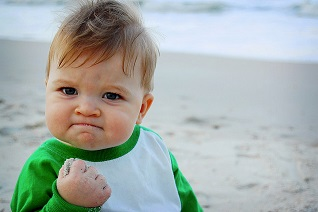

In [3]:
from IPython.display import Image
Image("img/rand/SuccessKid.jpg", width = 500)

Up to a bigger challenge?
Try to develope a code that replicates the neural network define in the first tutorial usign keras and train it with the diabetes database. Test it using the same train and test batches. How is the accuracy obtained by your network compared to the keras one? 

When developing and comparing machine learning techniques, many undesaribles mistakes can be made. For a simple review on what to avoid when working in machine learning check the following paper: https://arxiv.org/abs/2108.02497

Machine learning is a huge field, and we have just scratched the surface. We encourage you to keep learning and develop new ideas on how this techniques can be implemented in yout fild. 